<a href="https://colab.research.google.com/github/AbdulQadeer-55/Prediction-of-Corporate-Bankruptcy/blob/TeamA/1st_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff('1year.arff')
train= pd.DataFrame(data[0])
train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

In [ ]:
train.to_csv('1year.csv',index=False)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('column_names.csv')

In [ ]:
df.sample(10)

,Column Names
43,(receivables 365) / sales
19,(inventory 365) / sales
6,EBIT / total assets
22,net profit / sales
39,(current assets - inventory - receivables) / s...
53,constant capital / fixed assets
13,(gross profit + interest) / total assets
55,(sales - cost of products sold) / sales
29,(total liabilities - cash) / sales
21,profit on operating activities / total assets


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column Names  65 non-null     object
dtypes: object(1)
memory usage: 648.0+ bytes


In [ ]:
print(df)

                                         Column Names
0                           net profit / total assets
1                    total liabilities / total assets
2                      working capital / total assets
3             current assets / short-term liabilities
4   [(cash + short-term securities + receivables -...
..                                                ...
60                                sales / receivables
61              (short-term liabilities *365) / sales
62                     sales / short-term liabilities
63                               sales / fixed assets
64                                     Classification

[65 rows x 1 columns]


In [ ]:
def copy_column_names(source_file, target_file):
    # Read the CSV files into pandas dataframes, skip the first row in column_names.csv
    df_source = pd.read_csv(source_file, header=None, skiprows=1)

    # Transpose the dataframe to convert the vertical column names to horizontal
    df_source = df_source.T

    # The first row will contain the column names after transposing
    df_source.columns = df_source.iloc[0]

    # Read the target CSV file
    df_target = pd.read_csv(target_file)

    # Update the first row of the target DataFrame with the column names
    df_target.columns = df_source.columns

    # Write the updated target dataframe back to the CSV file
    df_target.to_csv(target_file, index=False)

# Replace the file paths with the actual paths of the uploaded CSV files in Colab
copy_column_names('/content/column_names.csv', '/content/1year.csv')

In [ ]:
data = pd.read_csv('1year.csv')

In [ ]:
data.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Classification
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
# Assuming you already have a dataframe called df
# Display rows from 117 to 119 (inclusive)
rows_117_to_119 = data.iloc[117:120]

print(rows_117_to_119)

     net profit / total assets  total liabilities / total assets  \
117                   0.099179                           0.58044   
118                   0.099179                           0.58044   
119                   0.009032                           0.30479   

     working capital / total assets  current assets / short-term liabilities  \
117                         0.25470                                   1.4388   
118                         0.25470                                   1.4388   
119                         0.18627                                   2.0094   

     [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365  \
117                                           -10.6760                                                                   
118                                           -10.6760                                                                   
119                                     

Check for duplicates

In [ ]:
# Check for duplicates
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the result
print(f"Number of duplicates: {num_duplicates}")
print("Duplicate rows:")
print(data[duplicates])

Number of duplicates: 82
Duplicate rows:
      net profit / total assets  total liabilities / total assets  \
118                    0.099179                          0.580440   
357                    0.151750                          0.649510   
558                    0.081602                          0.158440   
1113                   0.108470                          0.704280   
1199                   0.216060                          0.071064   
...                         ...                               ...   
5873                   0.044523                          0.571680   
5896                   0.158700                          0.511460   
5909                   0.133960                          0.639820   
6014                   0.124180                          0.282960   
6721                   0.054289                          0.221190   

      working capital / total assets  current assets / short-term liabilities  \
118                         0.254700             

In [ ]:
# Select duplicate row based on all columns
df2 = data[data.duplicated(keep=False)]
print(df2)

      net profit / total assets  total liabilities / total assets  \
117                    0.099179                           0.58044   
118                    0.099179                           0.58044   
332                    0.031542                           0.76873   
356                    0.151750                           0.64951   
357                    0.151750                           0.64951   
...                         ...                               ...   
5896                   0.158700                           0.51146   
5909                   0.133960                           0.63982   
6014                   0.124180                           0.28296   
6700                   0.054289                           0.22119   
6721                   0.054289                           0.22119   

      working capital / total assets  current assets / short-term liabilities  \
117                         0.254700                                  1.43880   
118      

Drop Duplicates

In [ ]:
#Check the number of rows before removing duplicates
num_rows_before = data.shape[0]

# Drop duplicates from the original DataFrame
data.drop_duplicates(keep='first', inplace=True)
#Check the number of rows after removing duplicates
num_rows_after = data.shape[0]

#Print the number of duplicate rows removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate rows removed: {num_duplicates_removed}")

Number of duplicate rows removed: 82


Change the data type of 'Classification' column to save up memory



In [ ]:
data['Classification'] = data['Classification'].str.replace('b','')
data['Classification'] = data['Classification'].str.replace("'","")
data.tail()


,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Classification
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.27414,73.505,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.80592,10.599,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.00000,10.470,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.59310,39.703,3.1420,261.850,1.3939,0.51005,1
7026,0.014946,0.94648,0.03211,1.03630,-20.5810,0.000000,0.015260,0.056357,2.96940,0.053341,...,0.015705,0.280210,0.97443,1.17920,15.036,4.1741,108.640,3.3599,35.11800,1


In [ ]:
data['Classification'] = data['Classification'].astype('int32')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6945 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   net profit / total assets                                                                                          6942 non-null   float64
 1   total liabilities / total assets                                                                                   6942 non-null   float64
 2   working capital / total assets                                                                                     6942 non-null   float64
 3   current assets / short-term liabilities                                                                            6916 non-null   float64
 4   [(cash + short-term secu

Check Null Values

In [ ]:
#the number of null value in each column
data.isnull().sum()

net profit / total assets                                                                                             3
total liabilities / total assets                                                                                      3
working capital / total assets                                                                                        3
current assets / short-term liabilities                                                                              29
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365     8
                                                                                                                     ..
sales / receivables                                                                                                  21
(short-term liabilities *365) / sales                                                                                 0
sales / short-term liabilities          

In [ ]:
# Set options to display all columns and a large number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 65)  # Change this value based on your needs

data.isnull().sum()

net profit / total assets                                                                                               3
total liabilities / total assets                                                                                        3
working capital / total assets                                                                                          3
current assets / short-term liabilities                                                                                29
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365       8
retained earnings / total assets                                                                                        3
EBIT / total assets                                                                                                     3
book value of equity / total liabilities                                                                               24
sales / total assets    

In [ ]:
#the number of null value in each column by percentage
data.isnull().sum()/len(data)*100

net profit / total assets                                                                                             0.043197
total liabilities / total assets                                                                                      0.043197
working capital / total assets                                                                                        0.043197
current assets / short-term liabilities                                                                               0.417567
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365     0.115191
retained earnings / total assets                                                                                      0.043197
EBIT / total assets                                                                                                   0.043197
book value of equity / total liabilities                                                                       

In [ ]:
data.describe(include='all')

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Classification
count,6942.000000,6942.000000,6942.000000,6916.000000,6.937000e+03,6942.000000,6942.000000,6921.000000,6944.000000,6942.000000,6906.000000,6916.000000,6945.000000,6942.000000,6.943000e+03,6921.000000,6921.000000,6942.000000,6945.000000,6.945000e+03,5334.000000,6942.000000,6945.000000,6821.000000,6942.000000,6921.000000,6.636000e+03,6911.000000,6942.000000,6945.000000,6945.000000,6907.000000,6916.000000,6921.000000,6942.000000,6942.000000,4236.000000,6942.000000,6945.000000,6916.000000,6861.000000,6945.000000,6.945000e+03,6.945000e+03,6815.000000,6915.000000,6916.000000,6942.000000,6945.000000,6921.000000,6942.000000,6916.000000,6911.000000,6911.000000,6.945000e+03,6.945000e+03,6944.000000,6.945000e+03,6944.000000,6.814000e+03,6924.000000,6.945000e+03,6916.000000,6911.000000,6945.000000
mean,0.070908,0.561813,0.119359,2.629890,-2.650394e+02,0.058839,0.343508,2.610324,5.044592,1.700811,0.384550,0.800572,2.113874,0.343508,1.780694e+03,0.871577,3.738357,0.343508,0.464124,1.175188e+03,10.490160,0.321370,0.425035,0.571272,1.078733,0.832931,1.337219e+03,2.724010,4.189901,23.832969,0.475487,235.745734,7.151267,3.684533,0.309330,5.393136,156.243707,1.787275,0.268411,0.825507,0.607747,0.262781,4.640667e+03,3.465508e+03,-30.566283,1.853022,87.028194,0.181210,-1.387017,2.038605,0.469018,0.581587,99.240240,100.165230,8.764952e+03,-1.595999e+02,0.199314,1.606041e+02,0.262991,4.376783e+02,15.721879,4.811511e+03,8.136340,208.581925,0.039021
std,3.402667,5.381501,5.306

Handle null values using median imputation

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with 63 columns containing null values

# Perform median imputation on each column
for column in data.columns:
    if data[column].isnull().any():  # Check if the column has null values
        column_median = data[column].median()
        data[column].fillna(column_median, inplace=True)


In [ ]:
# Set options to display all columns and a large number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 65)  # Change this value based on your needs

data.isnull().sum()

net profit / total assets                                                                                            0
total liabilities / total assets                                                                                     0
working capital / total assets                                                                                       0
current assets / short-term liabilities                                                                              0
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365    0
retained earnings / total assets                                                                                     0
EBIT / total assets                                                                                                  0
book value of equity / total liabilities                                                                             0
sales / total assets                            

Check for outliers using IQR

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a numerical column 'column_name' where you want to check for outliers

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['net profit / total assets'].quantile(0.25)
Q3 = data['net profit / total assets'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = data[(data['net profit / total assets'] < lower_bound) | (data['net profit / total assets'] > upper_bound)]
print(outliers)

      net profit / total assets  total liabilities / total assets  \
7                       0.53232                          0.027059   
21                     -0.30505                          1.252300   
29                     -0.35884                          1.117100   
48                     -0.22710                          0.559160   
53                      1.22960                          0.507820   
...                         ...                               ...   
6973                   -0.22832                          0.383050   
6994                   -0.19039                          1.611100   
6995                   -0.27804                          1.922000   
7001                   -0.28971                          1.187400   
7004                   -0.33033                          0.932660   

      working capital / total assets  current assets / short-term liabilities  \
7                            0.70554                                 53.95400   
21       

Using box plot

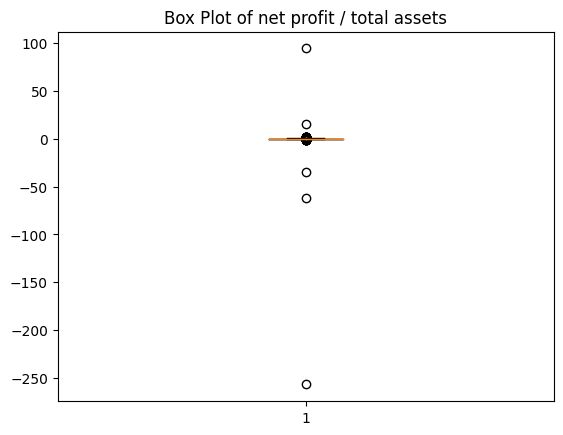

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a numerical column 'column_name' where you want to check for outliers

# Create a box plot for the 'column_name'
plt.boxplot(data['net profit / total assets'])

# Set a title for the plot
plt.title('Box Plot of net profit / total assets')

# Show the plot
plt.show()

Handling Outliers using isolation forst and sklearn library

In [ ]:
from sklearn.ensemble import IsolationForest
#Create an instance of IsolationForest with contamination parameter set to 0.1 (10% outliers)
outlier_detector = IsolationForest(contamination=0.1)

#Fit the Isolation Forest to the data and predict outliers
outlier_preds = outlier_detector.fit_predict(data)

#Count the number of outliers in the dataset
num_outliers = len(outlier_preds[outlier_preds == -1])
print("Number of outliers in the dataset:", num_outliers)

# Drop the rows containing outliers from the original DataFrame
data.drop(data[outlier_preds == -1].index, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers in the dataset: 695


In [ ]:
data.shape

(6250, 65)

Saving the resulted dataframe as a csv file

In [ ]:
import pandas as pd

# Assuming your DataFrame is called df
data.to_csv('data_file_1.csv', index=False)